# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
## Download the data
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'

file = 'traffic-signs-data.zip'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(file):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='Project Dataset') as pbar:
        urlretrieve(
            url,
            file,
            pbar.hook)
        
else:
    print("Data file already exists!")
    

Data file already exists!


In [2]:
# unzip the data
import zipfile
with zipfile.ZipFile(file,"r") as zip_ref:
    zip_ref.extractall("traffic-signs-data/")

print('Done unzipping data')

Done unzipping data


In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]
image_shape = X_train.shape[1:3]
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

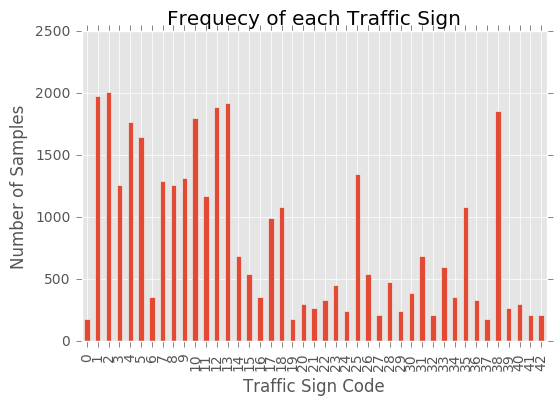

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import pandas as pd
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.style.use('ggplot')

labels = pd.DataFrame(y_train)

ax = labels[0].value_counts().sort_index().plot.bar(title='Frequecy of each Traffic Sign')
ax.set_xlabel("Traffic Sign Code")
ax.set_ylabel("Number of Samples")

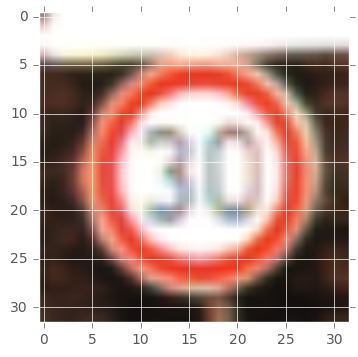

In [4]:
# Take a look at some of the images
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline
imshow(X_train[3000])

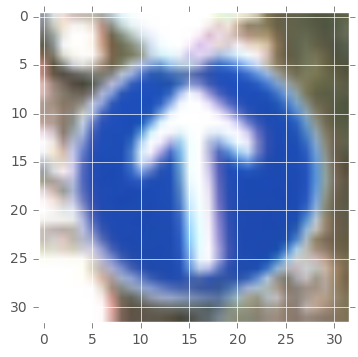

In [7]:
imshow(X_train[20000])

27


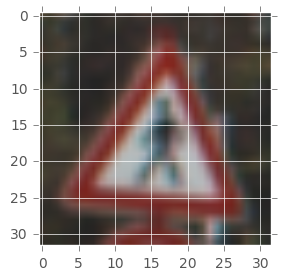

In [8]:
import random

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(3,3))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Techniques used include:
- scaling values between -1 and 1
- shuffling data

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn import preprocessing
# scaler = preprocessing.StandardScaler().fit(X_test)
# X_test_n = scaler.transform(X_test)
# np.mean(X_test_n)

def scale(x, feature_range=(-1, 1)):
    # scale to (0, 1)
    x = ((x - x.min())/(255 - x.min()))

    # scale to feature_range
    min, max = feature_range
    x = x * (max - min) + min
    return x

X_train = scale(X_train)
X_test = scale(X_test)
X_valid = scale(X_valid)
print('Done')

Done


In [6]:
from sklearn.utils import shuffle
# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train)
print('Done')

Done


### Model Architecture
The model architecture used was the LeNet model which is a 5 layer concolutional neural network incorporating rectified linear unit (relu) activations, max pooling and drop out. This model uses two layers of convolution and three layers of fully connected network to classify road signs.

In [50]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

# Ideas
# More layers 
# more epochs
# wider layers
# batch norming?
# learning rate optimisation
# Put this up on amazon

EPOCHS = 30
BATCH_SIZE = 256
keep_prob = 0.8
num_classes = 43
rate = 0.001

In [58]:
from tensorflow.contrib.layers import flatten
tf.reset_default_graph()

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1, name='relu1')

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.layers.dropout(conv1, rate=keep_prob)


    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # Activation.
    conv2 = tf.nn.relu(conv2, name='relu2')
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.layers.dropout(conv2, rate=keep_prob)


    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.layers.dropout(fc1, rate=keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    # Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.layers.dropout(fc2, rate=keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, num_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(num_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

print('Done')

Done


In [59]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, num_classes)

print('Done')

Done


In [60]:
# Setup the Ops
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
make_prediction = tf.nn.softmax(logits)

print('Done')

Done


In [46]:
# Setup the Evalution Metrics 
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print('Done')

Done


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [61]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Train the Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...



ValueError: Fetch argument <tf.Tensor 'Mean_1:0' shape=<unknown> dtype=float32> cannot be interpreted as a Tensor. (Tensor Tensor("Mean_1:0", dtype=float32) is not an element of this graph.)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

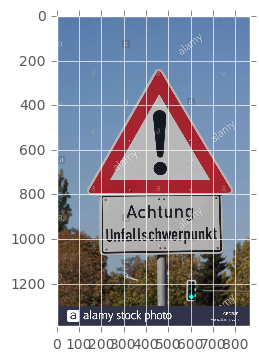

In [19]:
im2 = mpimg.imread("general_caution.jpg")
plt.imshow(im2)

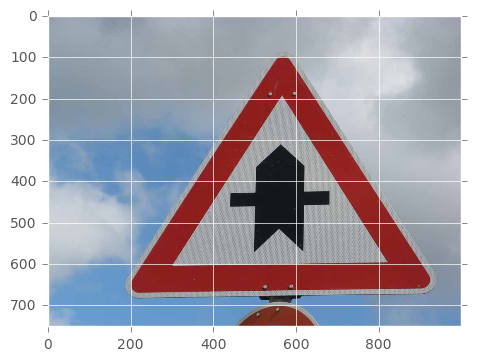

In [20]:
im3 = mpimg.imread("right_of_way.jpg")
plt.imshow(im3)

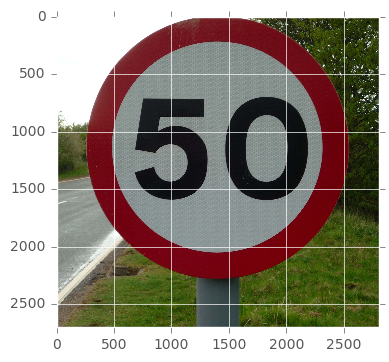

In [21]:
im4 = mpimg.imread("50_sign.jpg")
plt.imshow(im4)

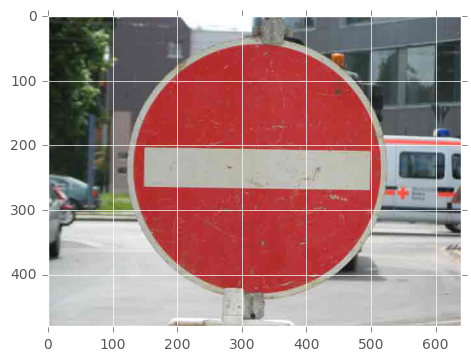

In [22]:
im5 = mpimg.imread("Do-Not-Enter.jpg")
plt.imshow(im5)

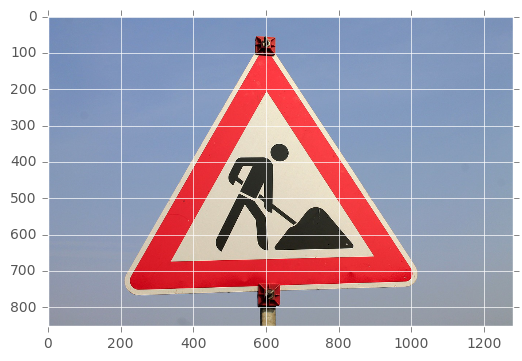

In [23]:
im6 = mpimg.imread("roadwork2.jpg")
plt.imshow(im6)

### Predict the Sign Type for Each Image

In [12]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

import pandas as pd
from skimage.transform import resize
from scipy.ndimage import imread
from PIL import Image

def classify_image(path):
#     test_img = imread(path)
#     image_resized = resize(test_img, (32, 32))
#     plt.imshow(image_resized )

    width, height = 32, 32
    im1 = Image.open(path)
    image_resized = np.asarray(im1.resize((width, height), Image.ANTIALIAS) )
    print(type(image_resized))
    imshow(image_resized)
    img = image_resized.reshape(1,32,32,3)
    ## Preprocess
    img_scaled = scale(img)
    
    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        print(">>> Model Loaded")
        feed = {x: img_scaled}
        prediction = sess.run(make_prediction, feed_dict=feed).squeeze()


    signnames = pd.read_csv('signnames.csv')    
    n_classes = 43 #len(classes)
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.barh(np.arange(n_classes), prediction)
    _ = plt.yticks(np.arange(n_classes), signnames['SignName']) 

    
print('Done')

Done


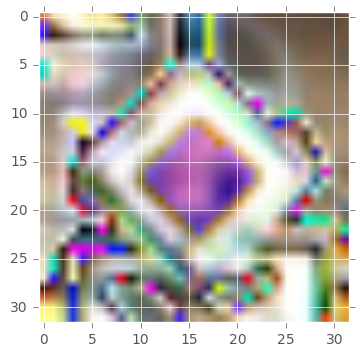

In [14]:
# An Example of a turn right
my_y = pd.DataFrame(y_train)
rows = my_y.loc[my_y[0]==12].index
plt.imshow(X_train[rows[200]])


<class 'numpy.ndarray'>
>>> Model Loaded


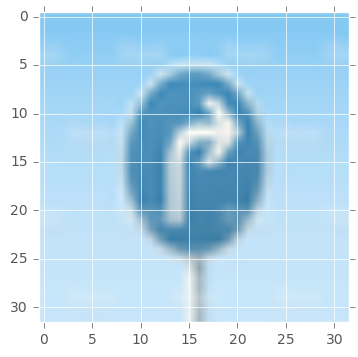

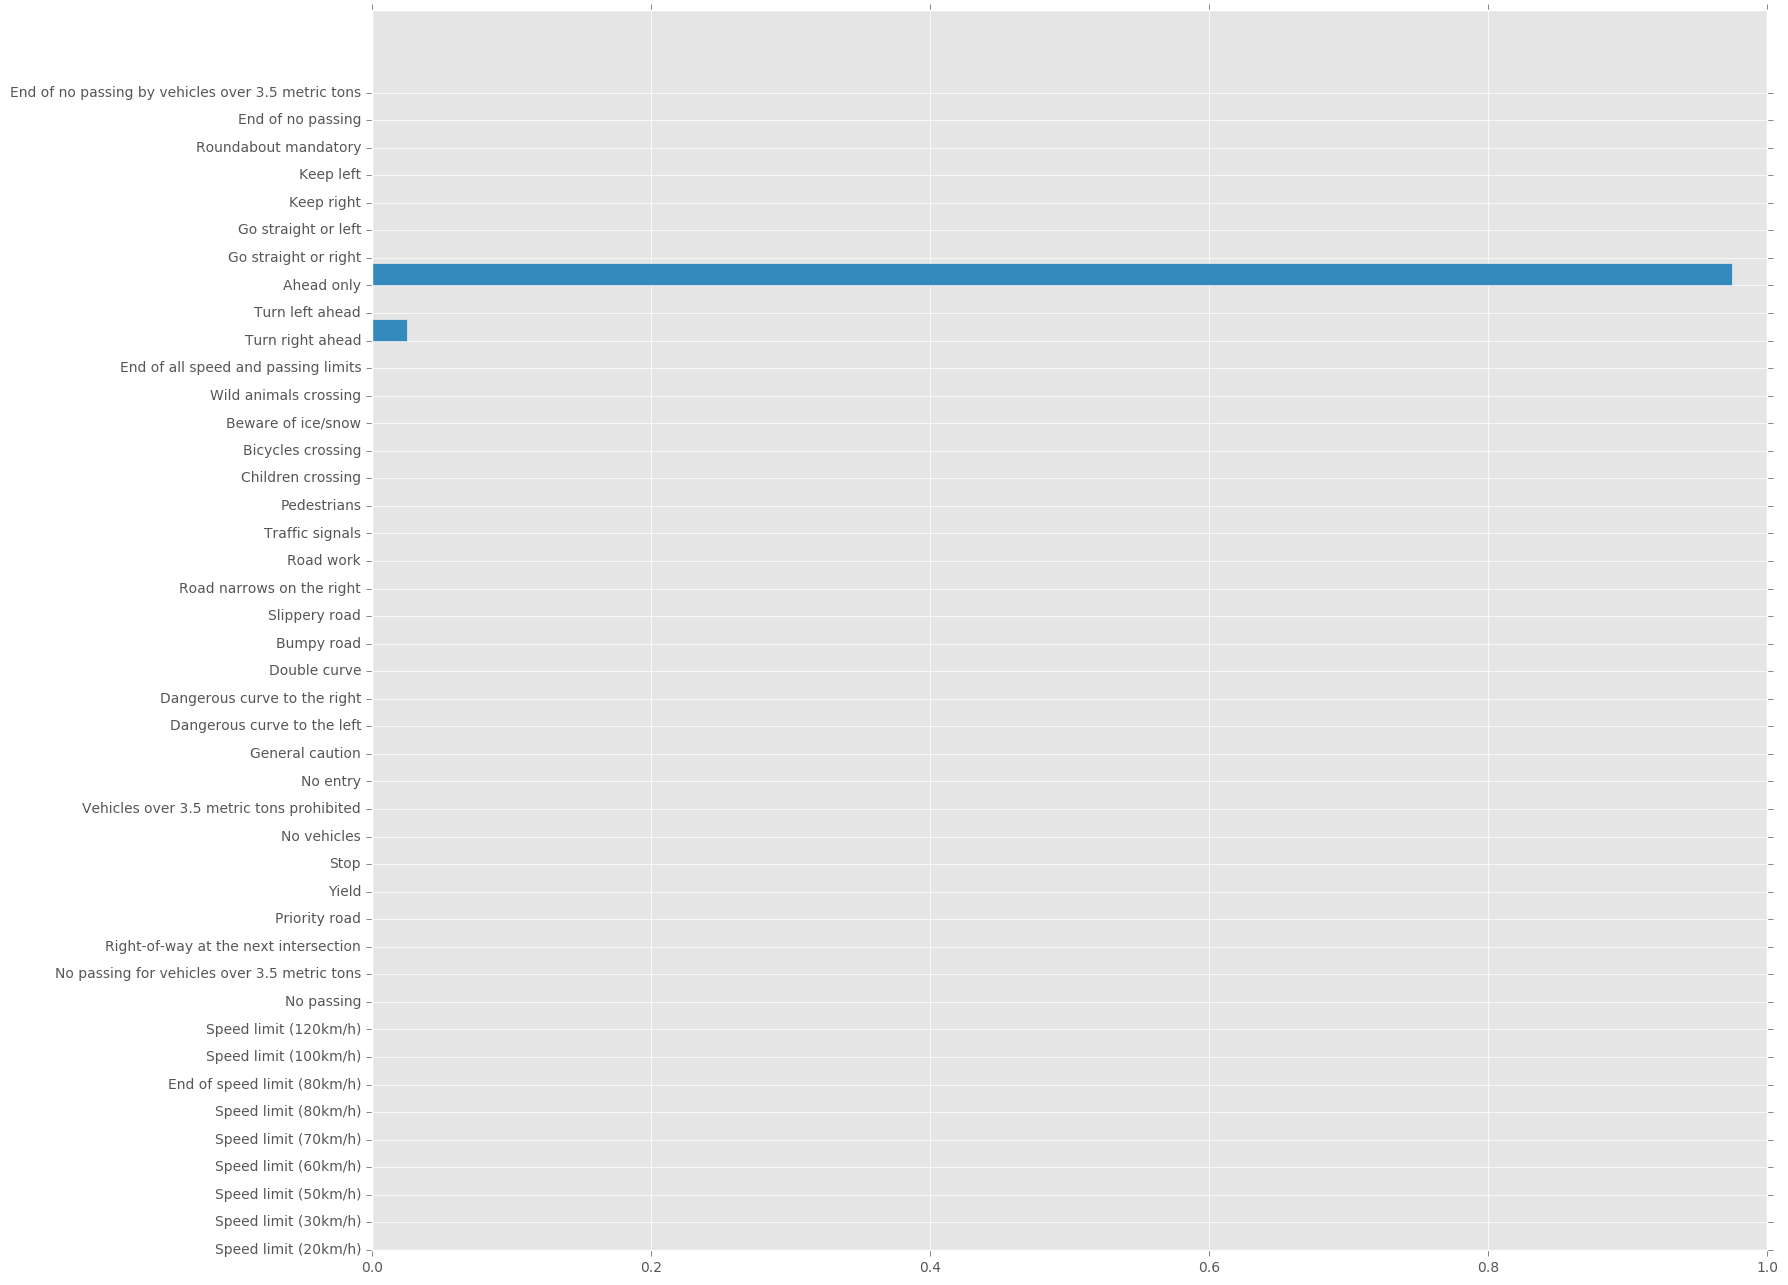

In [26]:
classify_image('turn-right.jpg')

<class 'numpy.ndarray'>
>>> Model Loaded


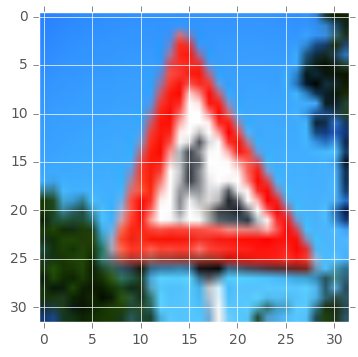

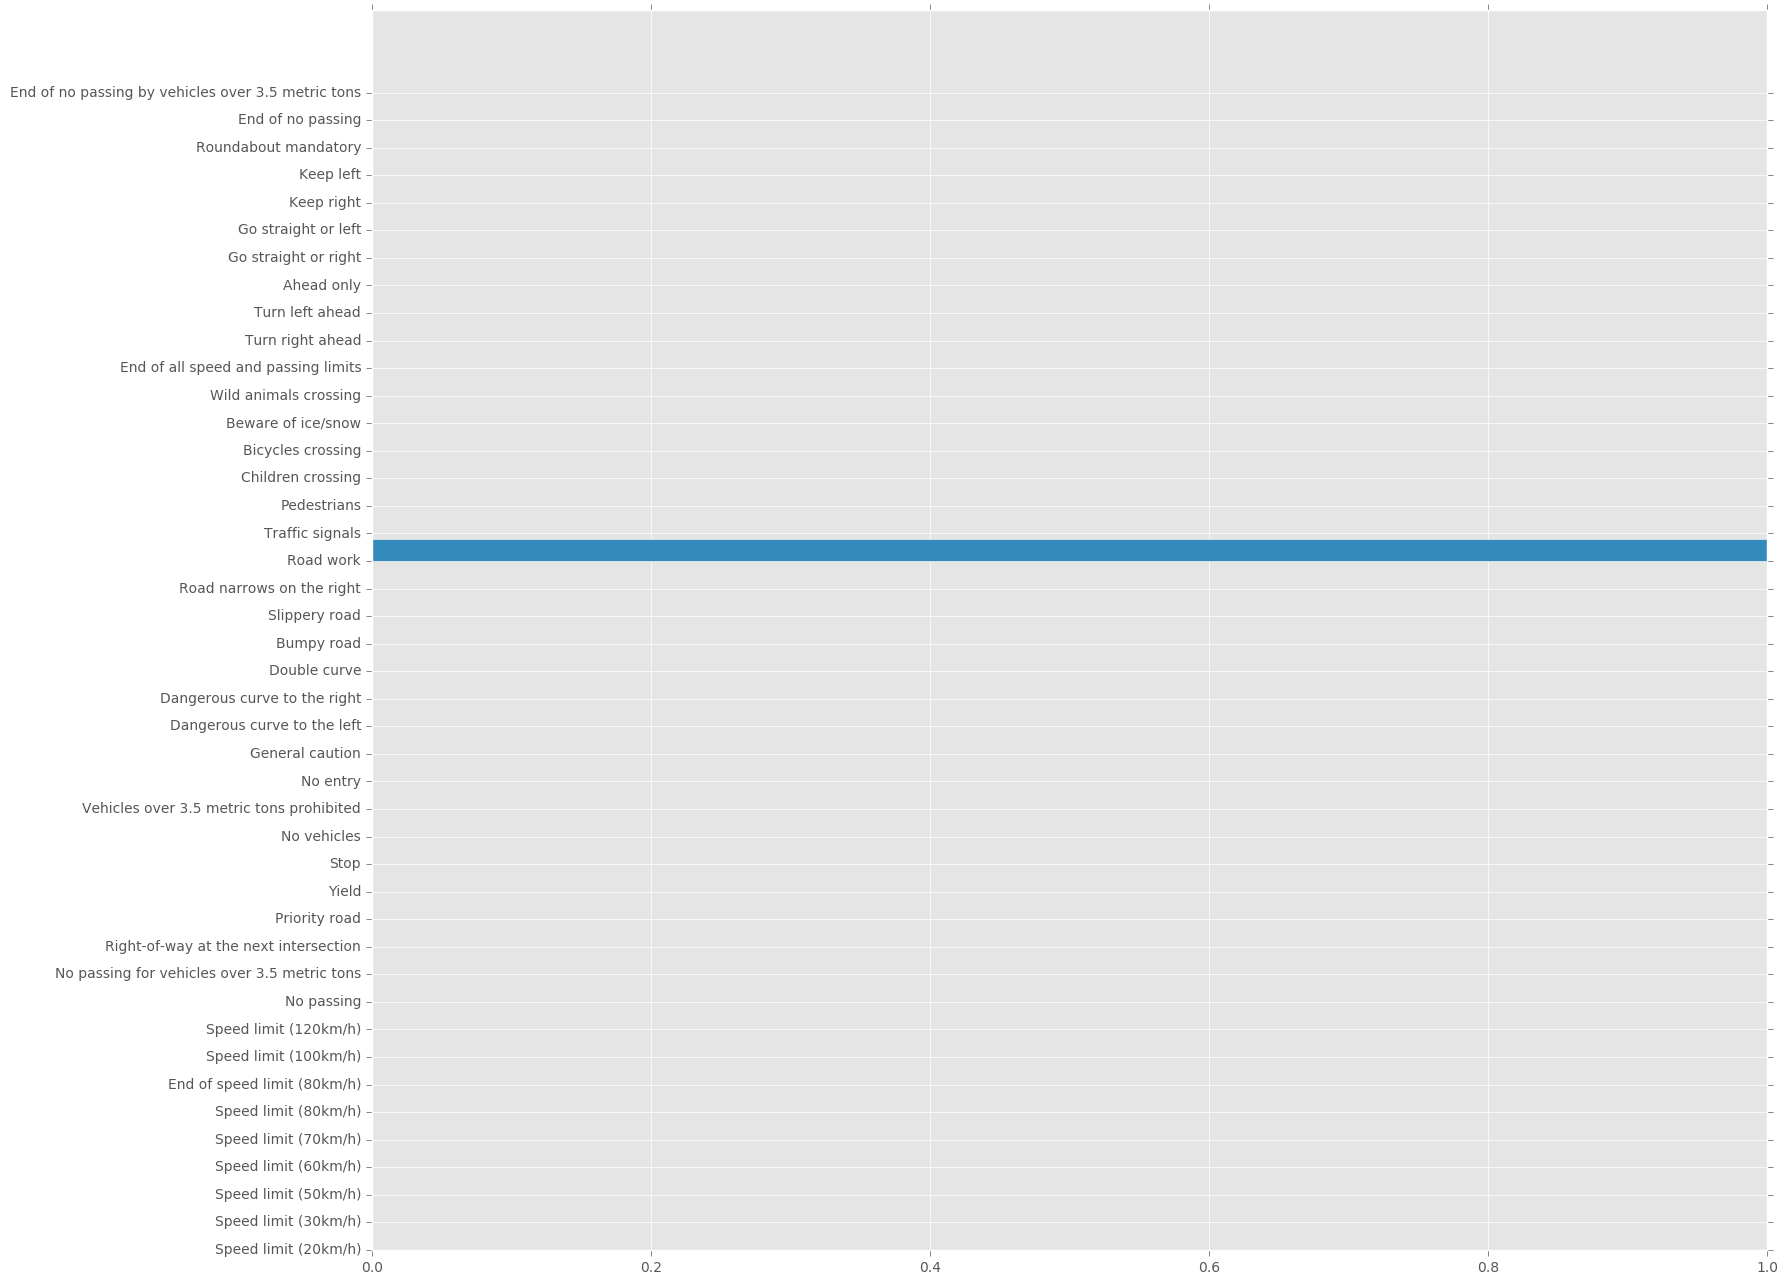

In [27]:
classify_image('road-work.jpg')

<class 'numpy.ndarray'>
>>> Model Loaded


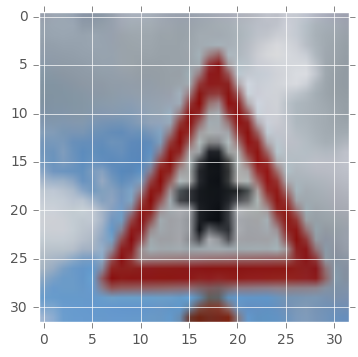

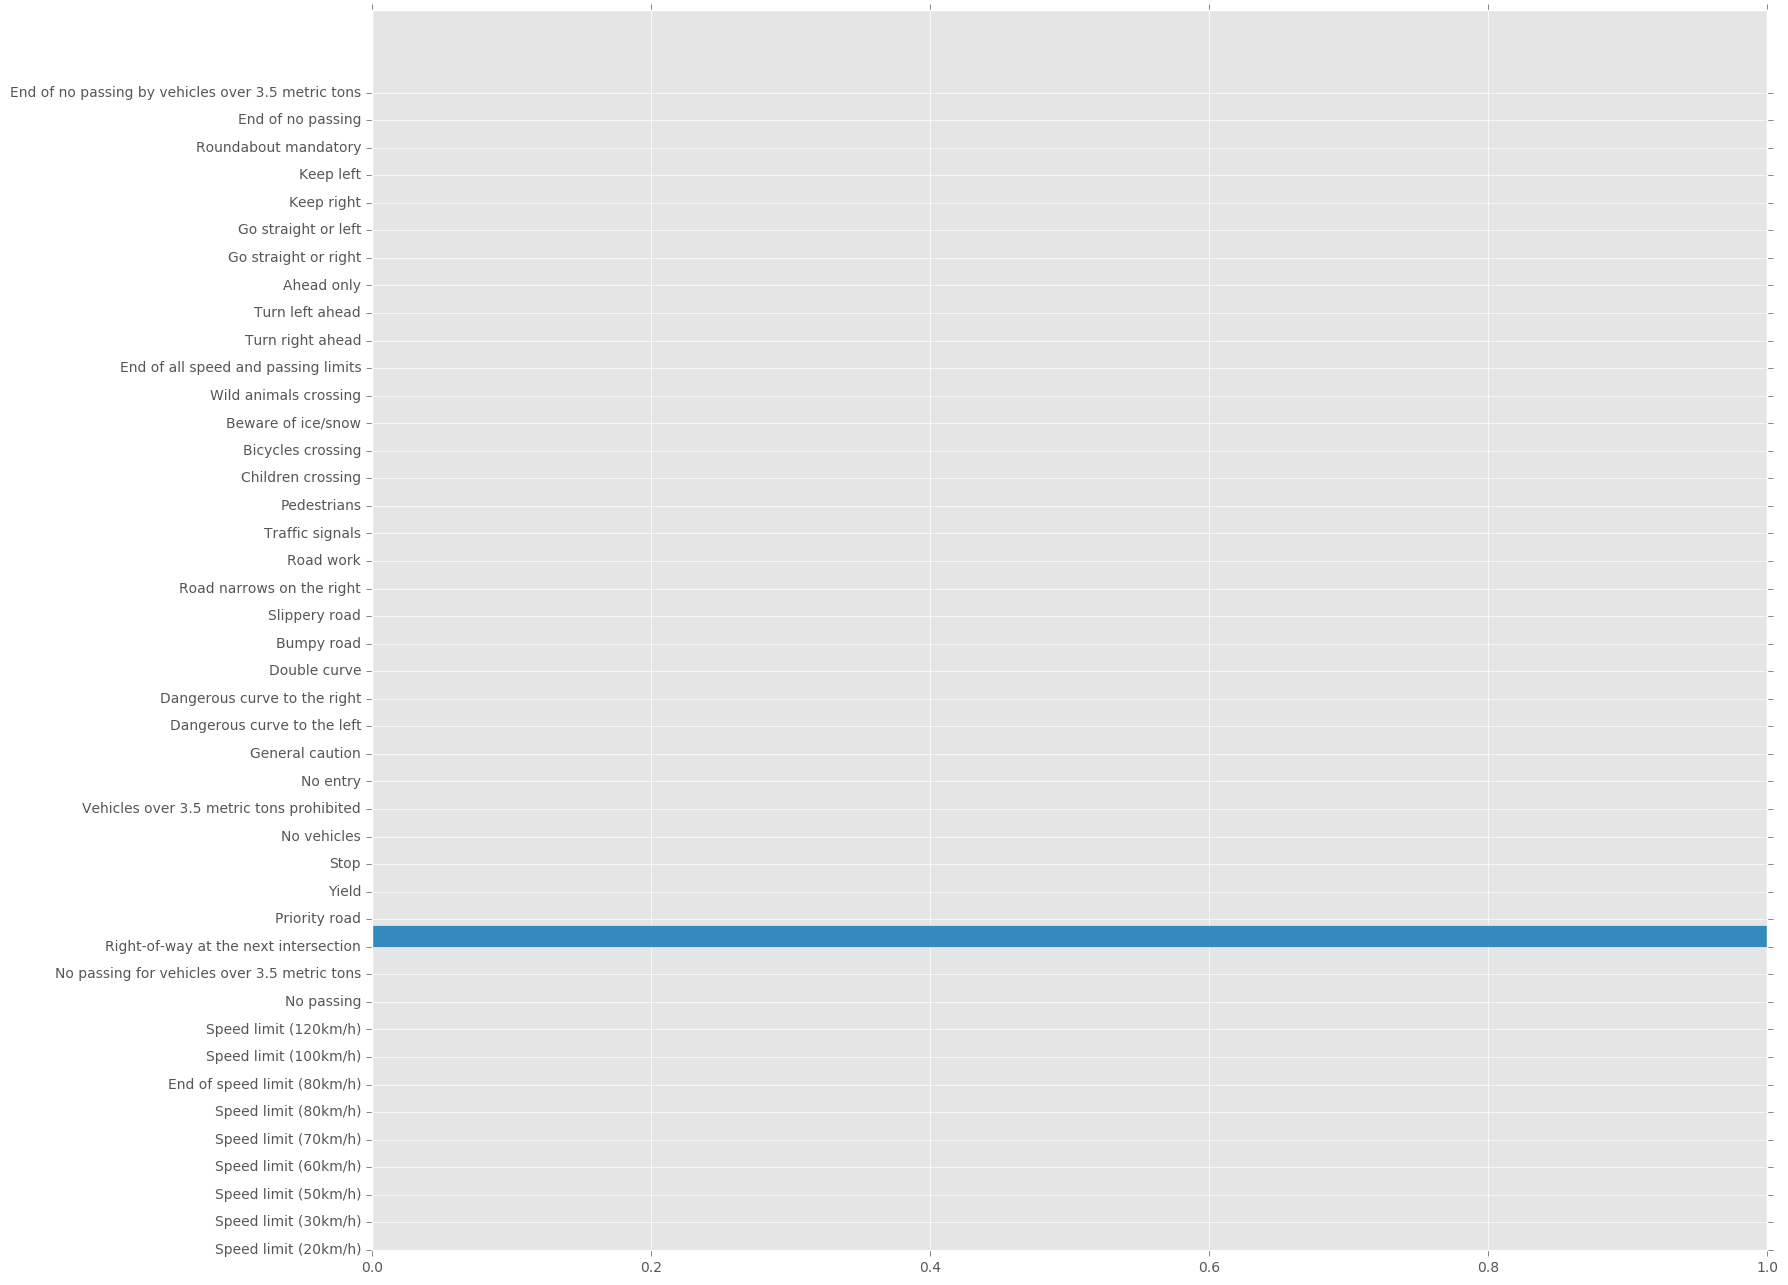

In [28]:
classify_image('right_of_way.jpg')

<class 'numpy.ndarray'>
>>> Model Loaded


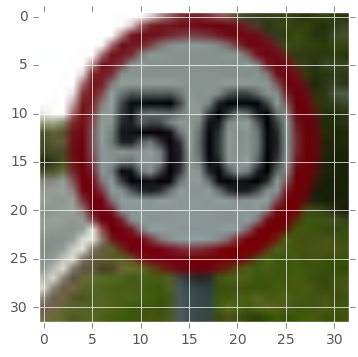

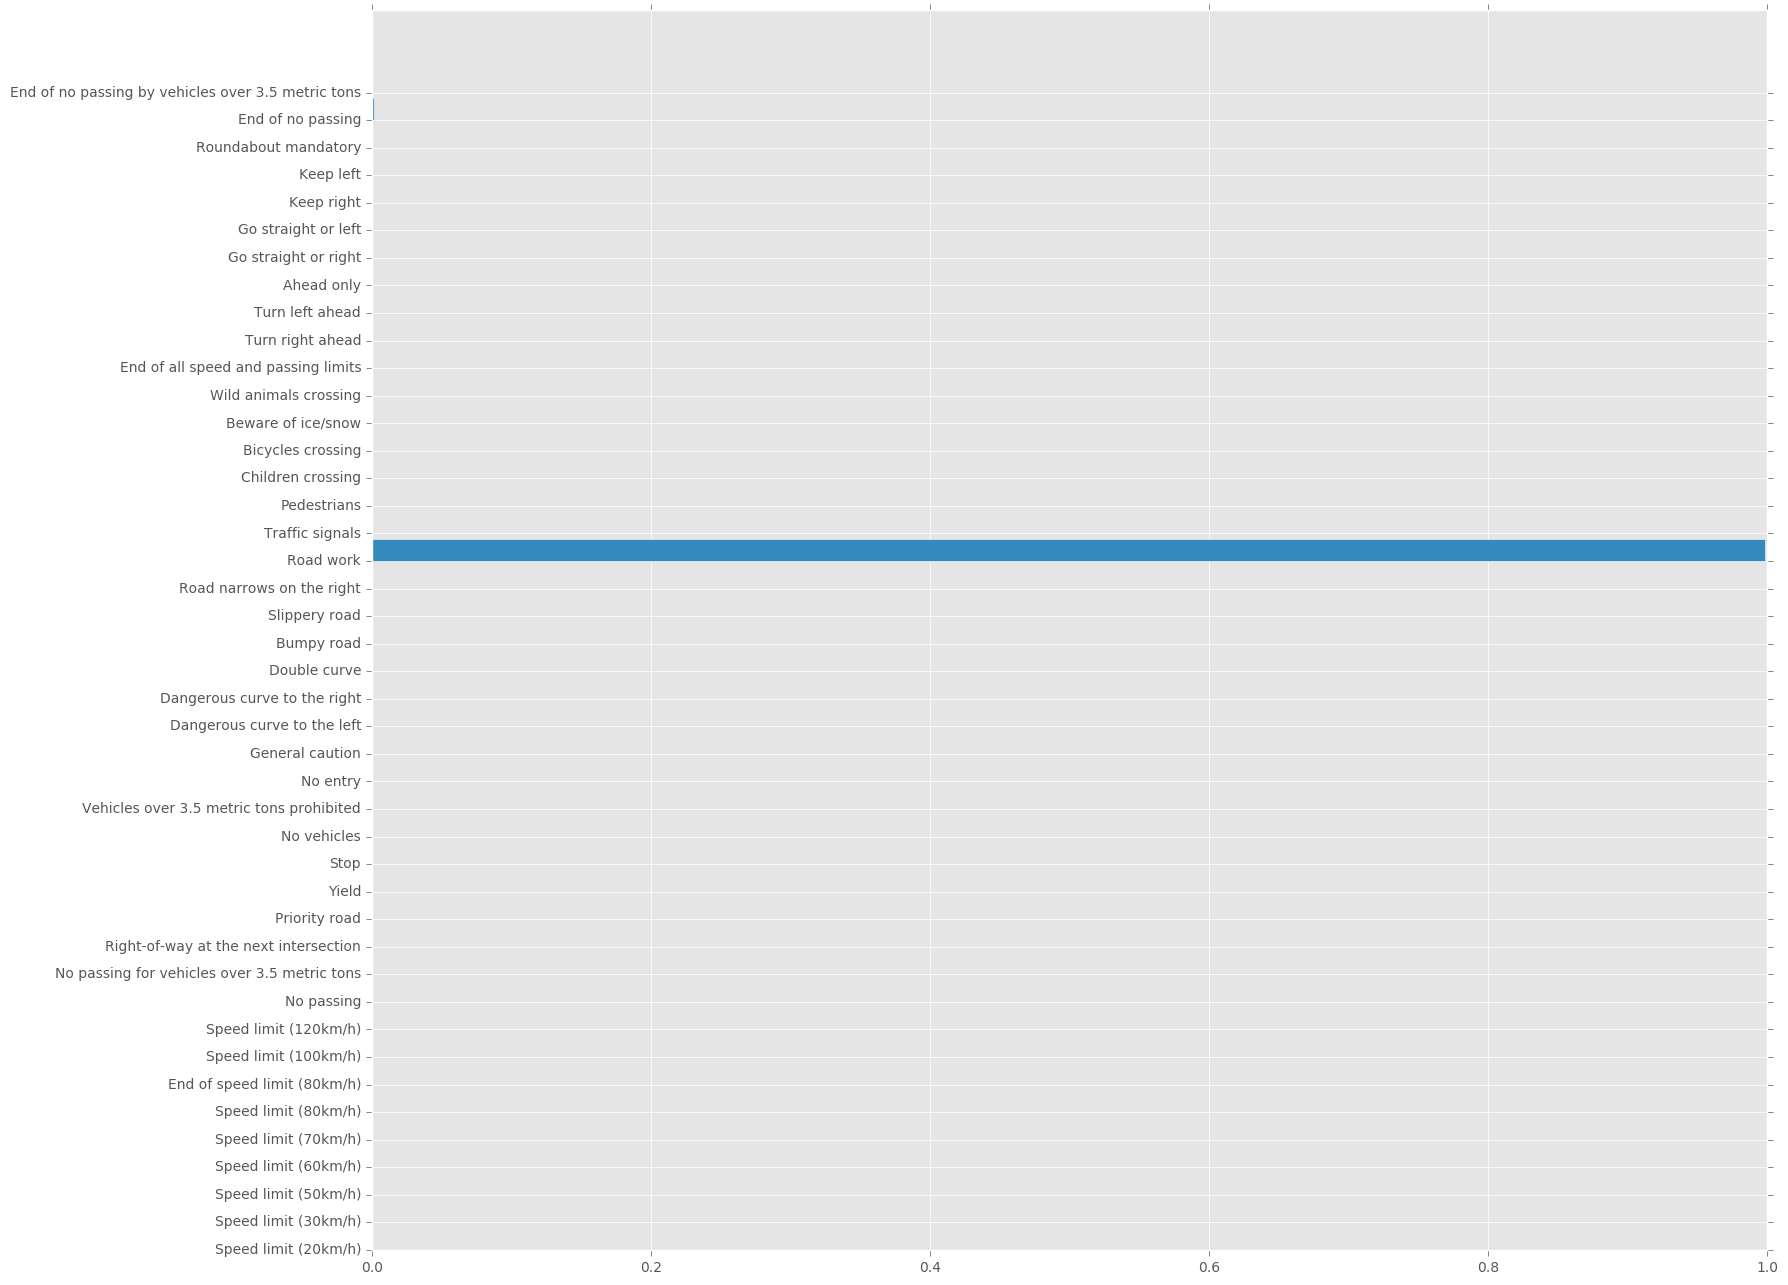

In [29]:
classify_image('50_sign.jpg')

<class 'numpy.ndarray'>
>>> Model Loaded


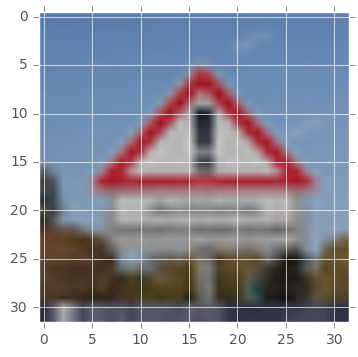

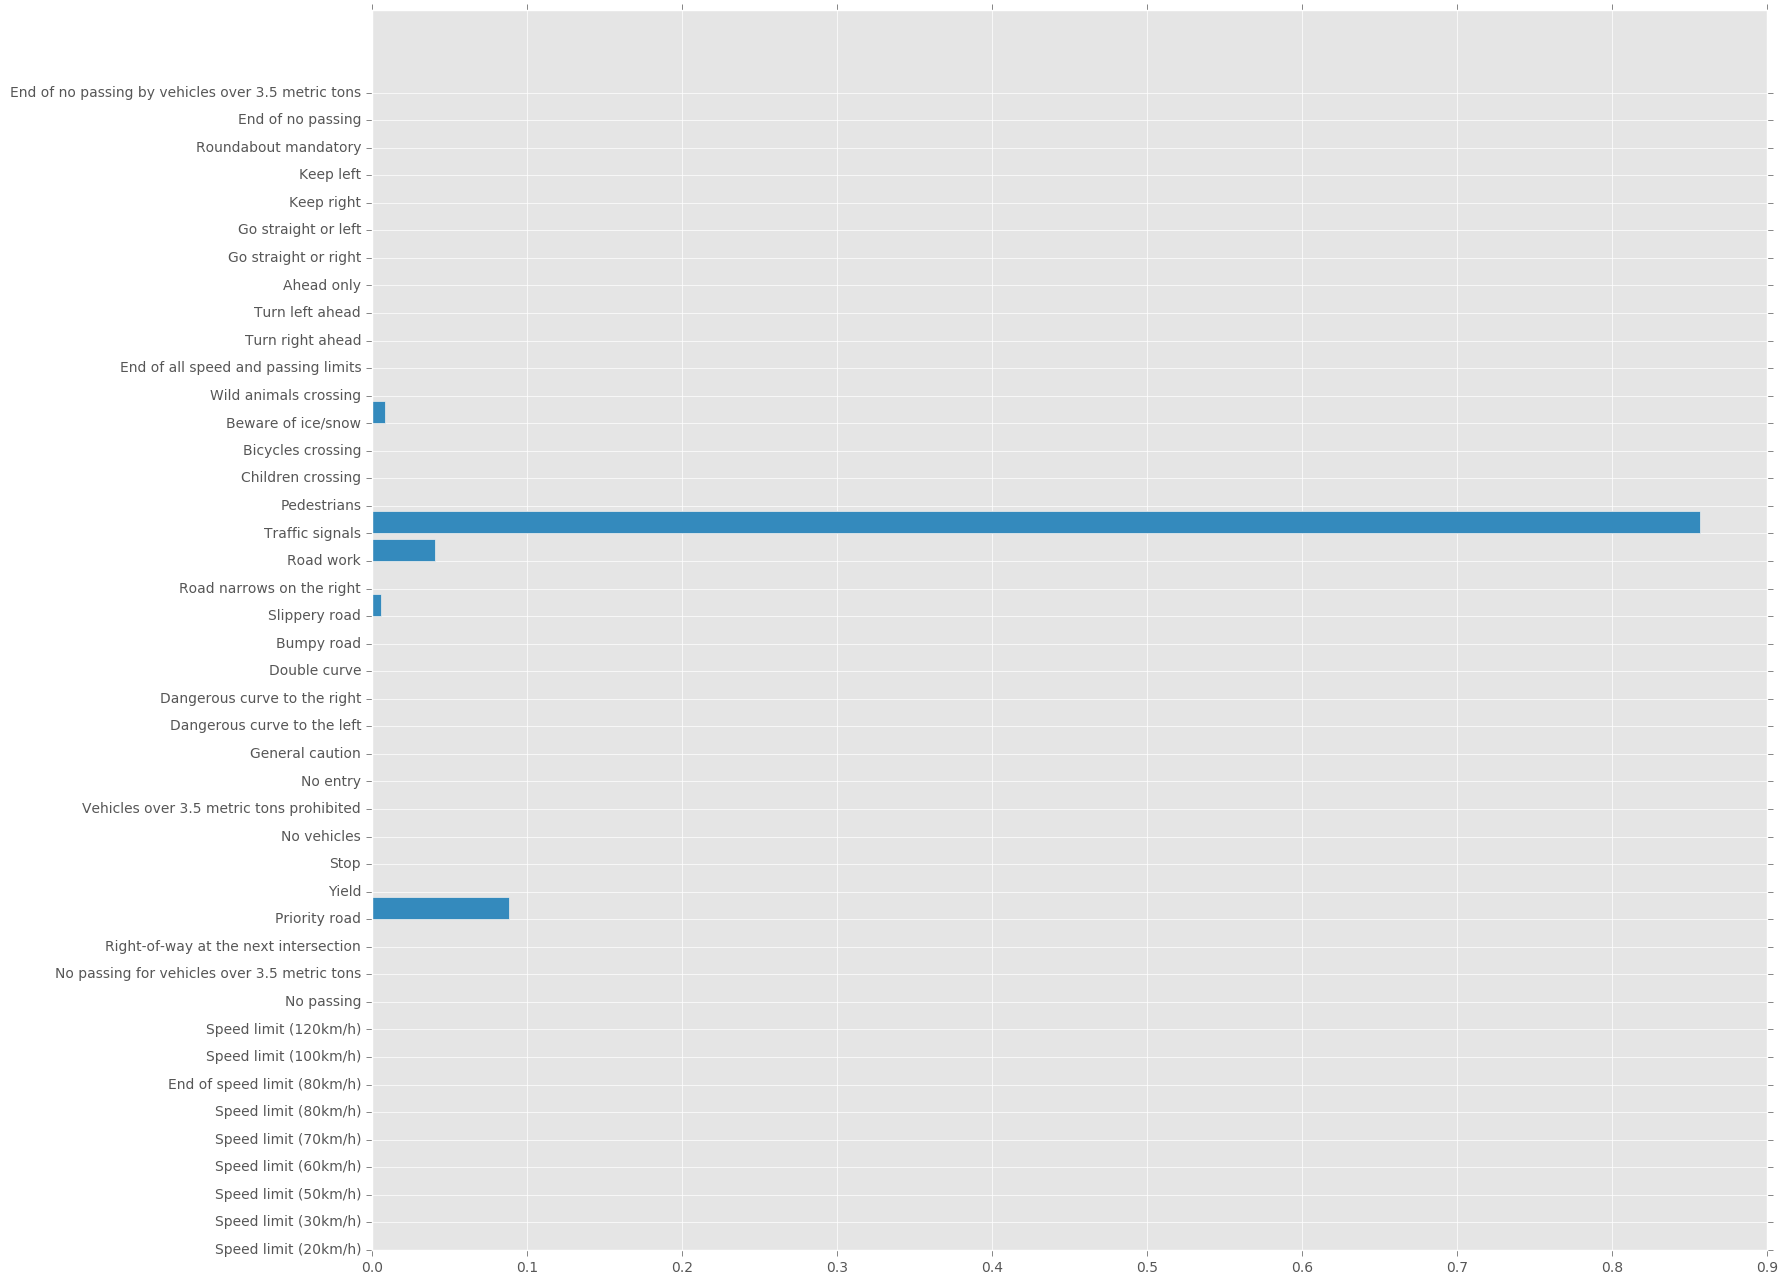

In [30]:
classify_image('general_caution.jpg')

<class 'numpy.ndarray'>
>>> Model Loaded


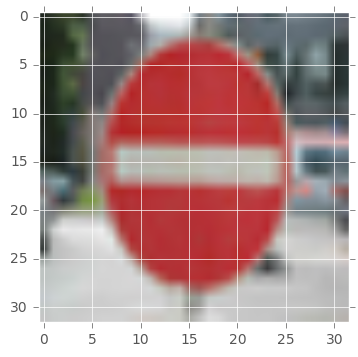

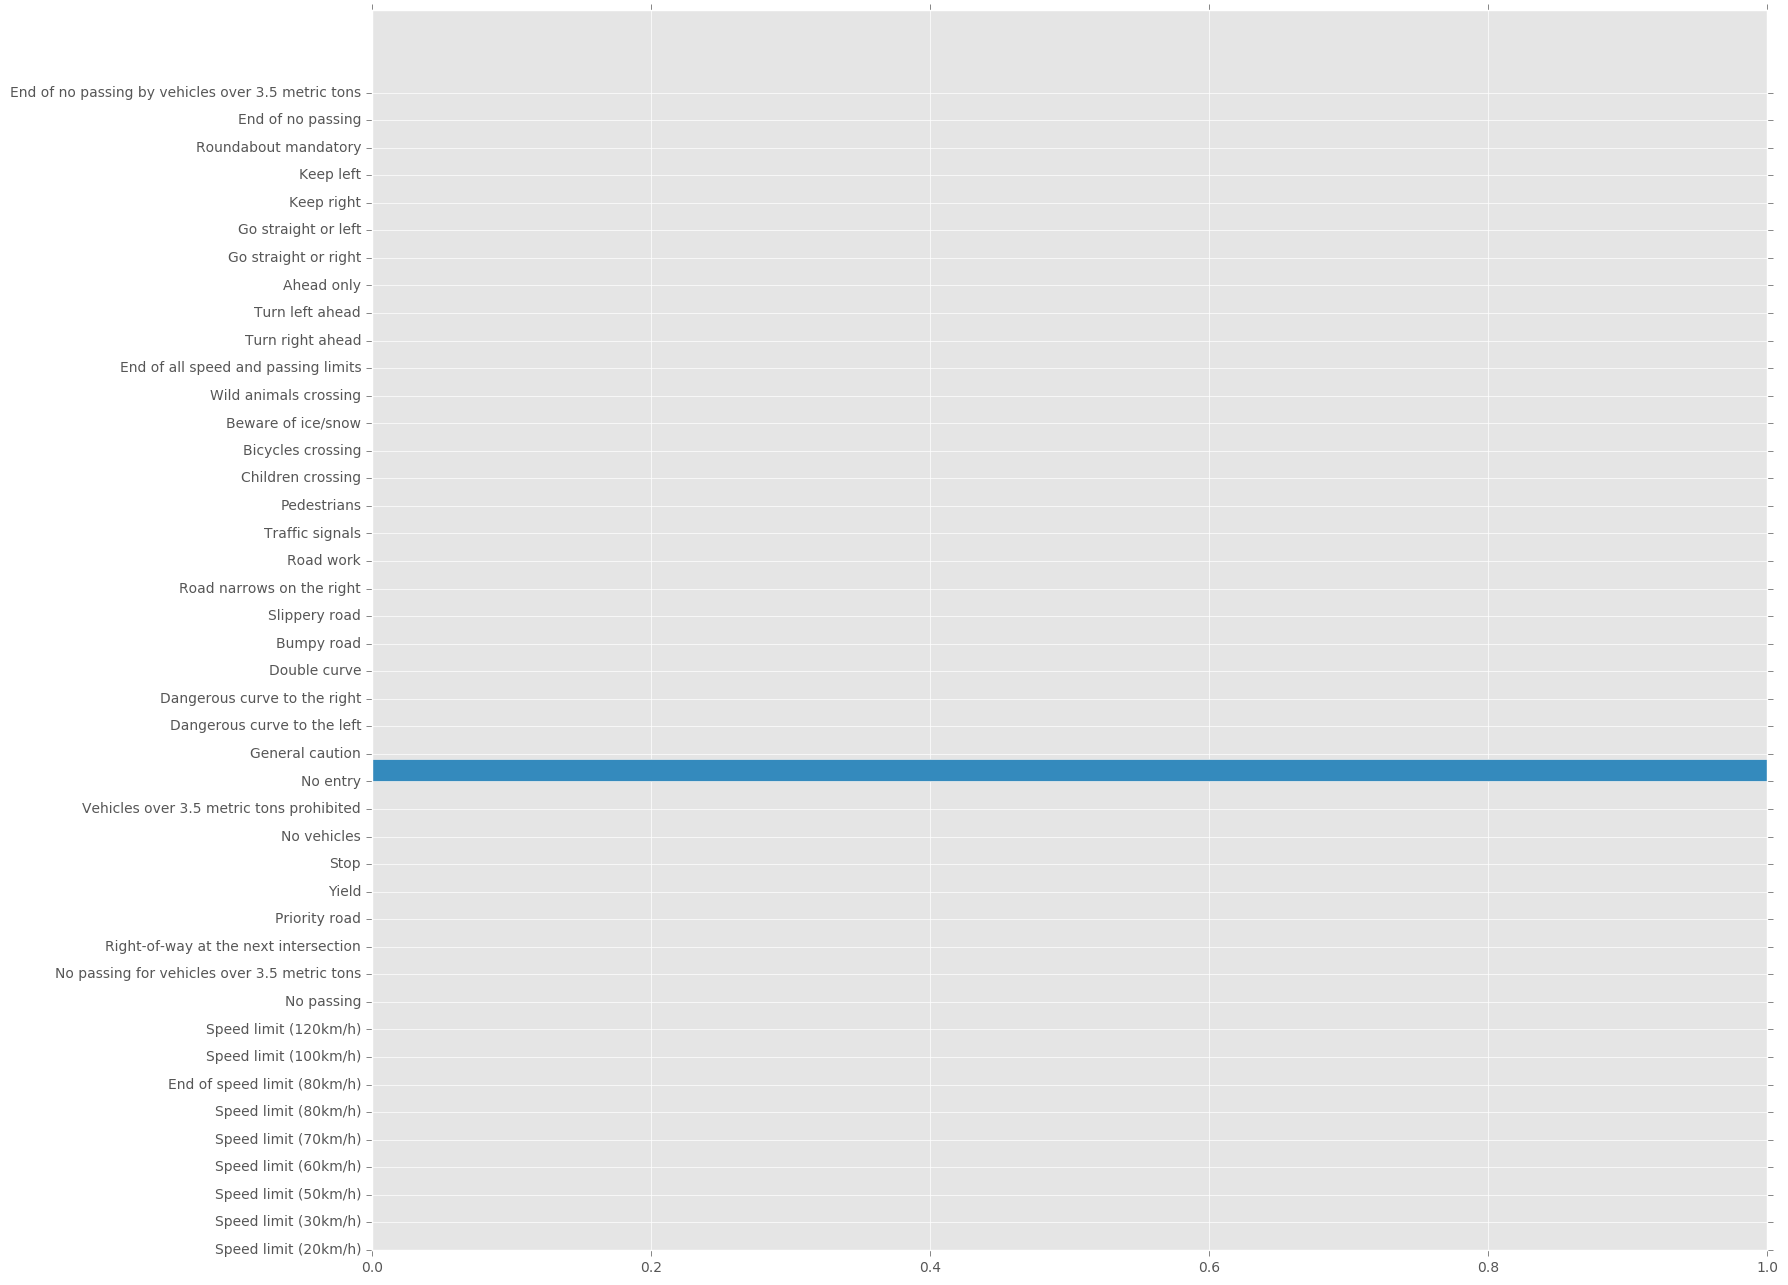

In [31]:
classify_image('Do-Not-Enter.jpg')

<class 'numpy.ndarray'>
>>> Model Loaded


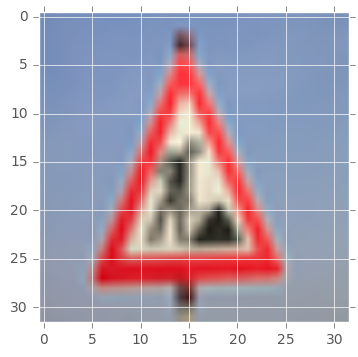

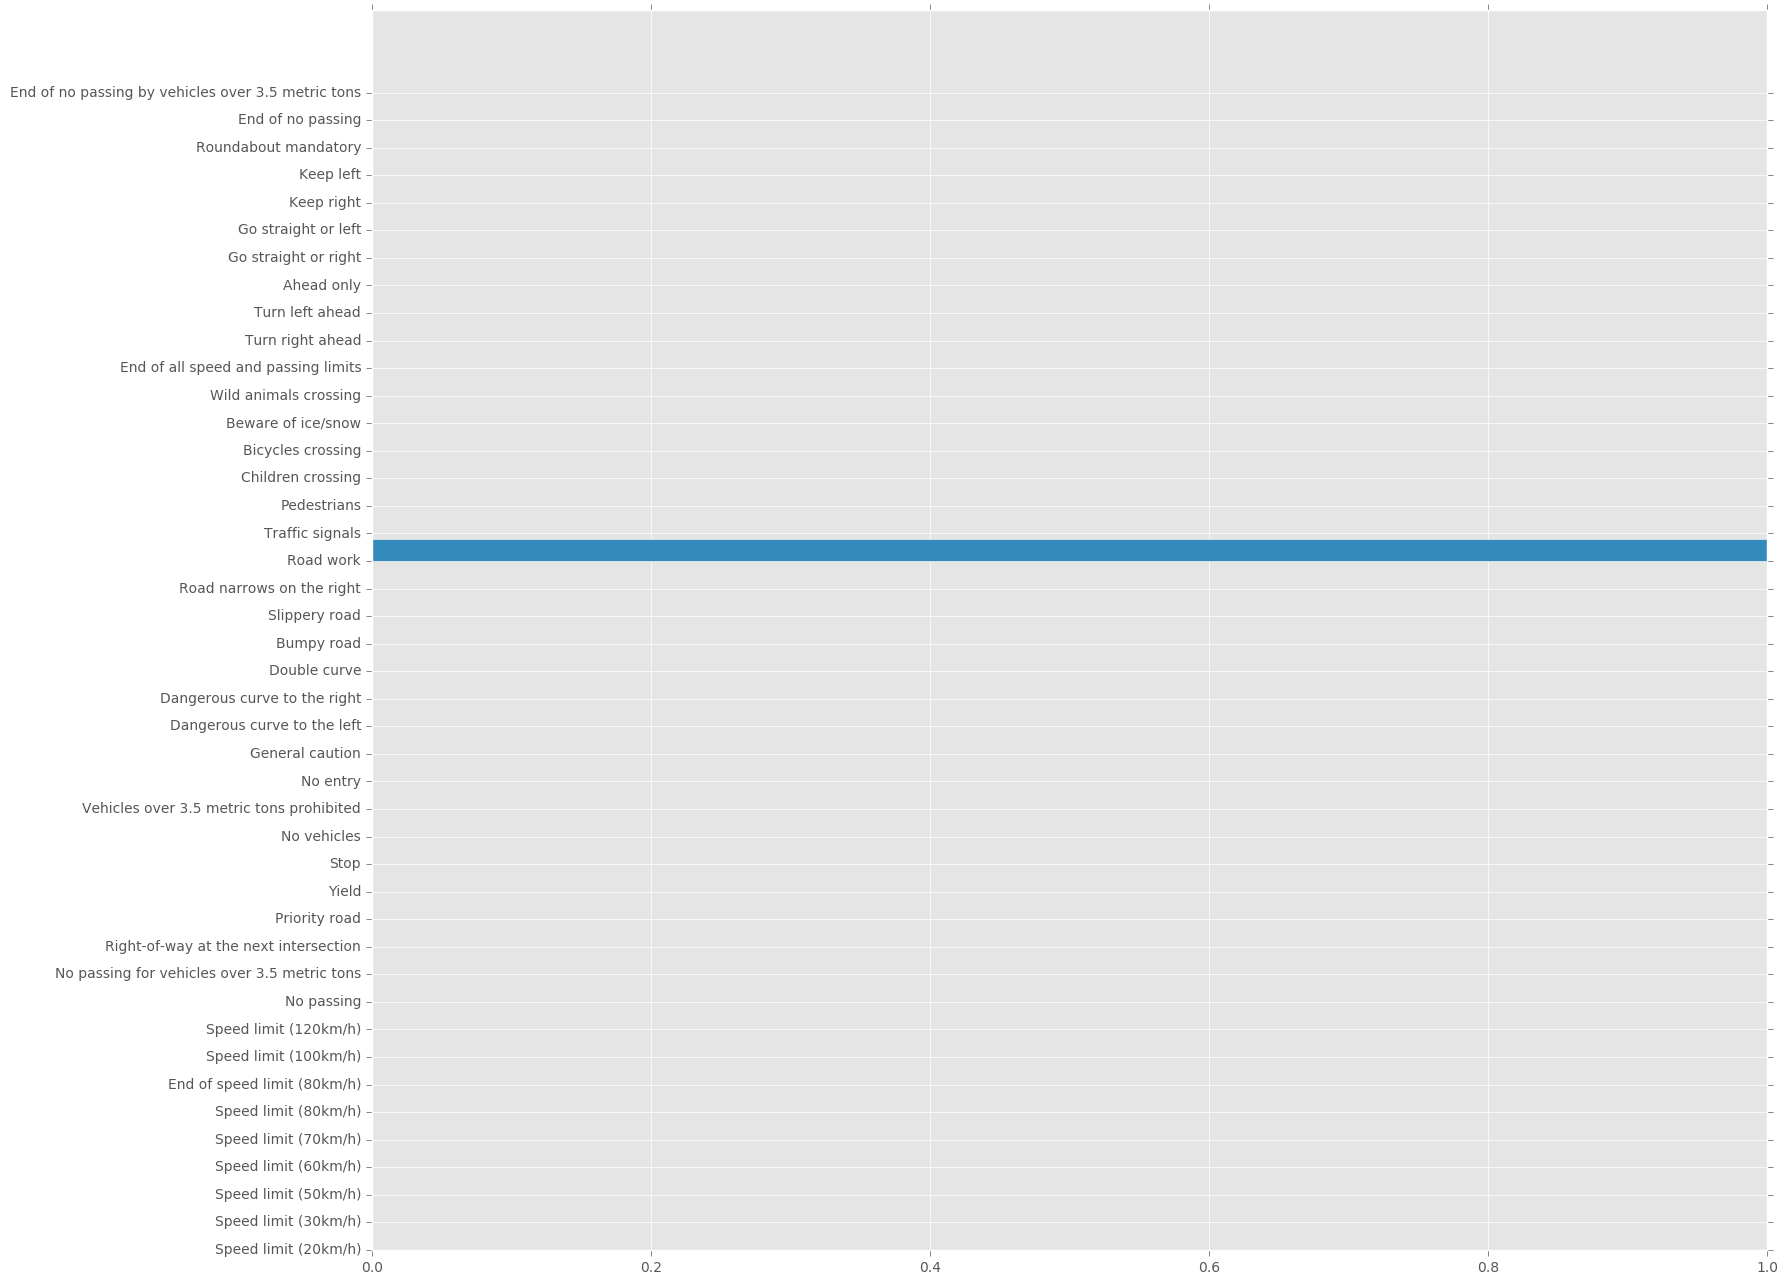

In [32]:
classify_image('roadwork2.jpg')

### Analyze Performance

In [38]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print('The algorithm correctly identified', str(round(4/7*100,2))+'%', 'of new images.' )

The algorithm correctly identified 57.14% of new images.


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [15]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

img_paths = ['roadwork2.jpg'
            ,'Do-Not-Enter.jpg'
            ,'general_caution.jpg'
            ,'50_sign.jpg'
            ,'right_of_way.jpg'
            ,'road-work.jpg'
            ,'turn-right.jpg']

width, height = 32, 32
data = []
for path in img_paths:
    im1 = Image.open(path)
    image_resized = np.asarray(im1.resize((width, height), Image.ANTIALIAS) )
    img = image_resized.reshape(32,32,3)
    ## Preprocess
    data.append( scale(img) )
    

    
a = np.asarray( data )

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print(">>> Model Loaded")
    feed = {x: a}
    prediction = sess.run(make_prediction, feed_dict=feed).squeeze()
    top5 = sess.run(tf.nn.top_k(tf.constant(prediction), k=5))

print('Done')

>>> Model Loaded
Done


In [16]:
## Put the top 5 into a human readable form

signnames = pd.read_csv('signnames.csv')  
results = []
for s in range(len(a)):
    probs = top5.values[s]
    idx = top5.indices[s]
    for j in range(5):
        name = signnames['SignName'][signnames['ClassId'] == idx[j]].values[0]
        value = probs[j]
        results.append((s, name, value))
    
my_top5 = pd.DataFrame(results, columns = ['image_id', 'sign_desc', 'probability' ])
my_top5.head()

,image_id,sign_desc,probability
0,0,Road work,1.000000e+00
1,0,Road narrows on the right,7.298869e-17
2,0,Double curve,3.095267e-17
3,0,Bumpy road,1.799484e-18
4,0,Bicycles crossing,1.590685e-23


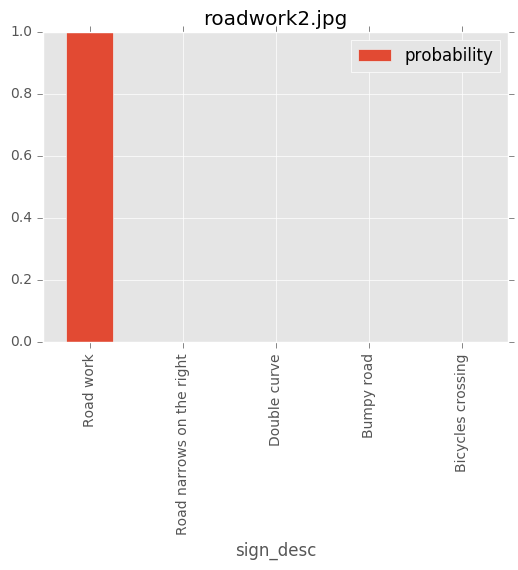

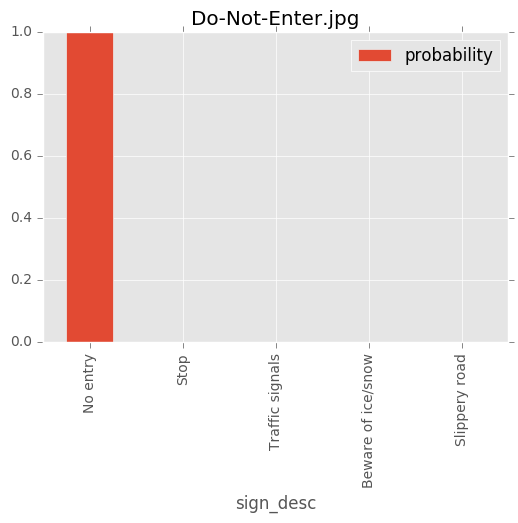

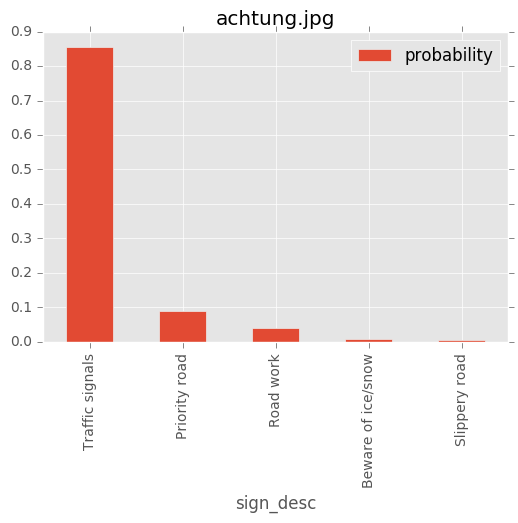

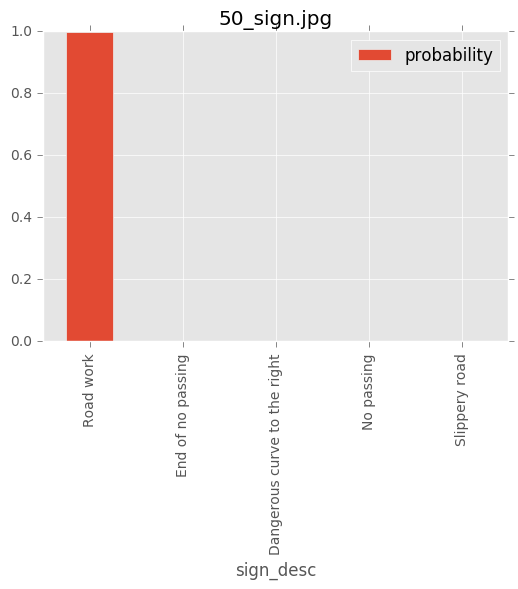

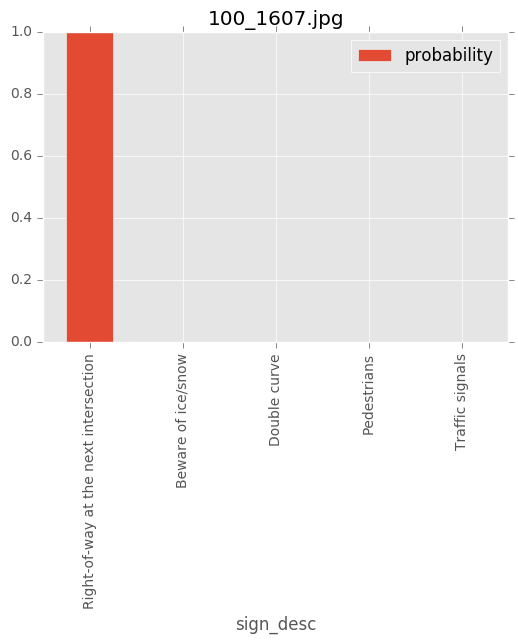

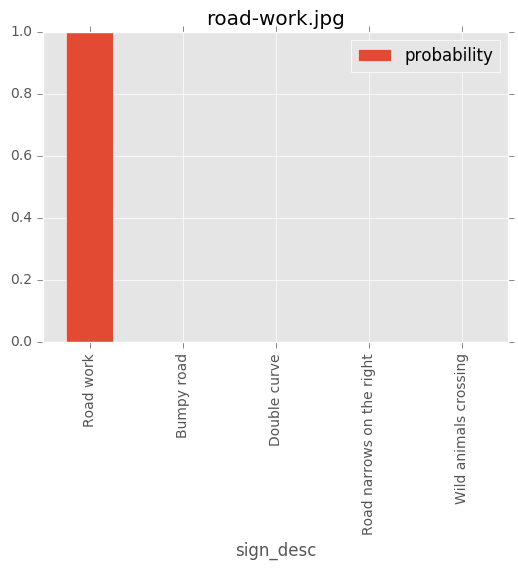

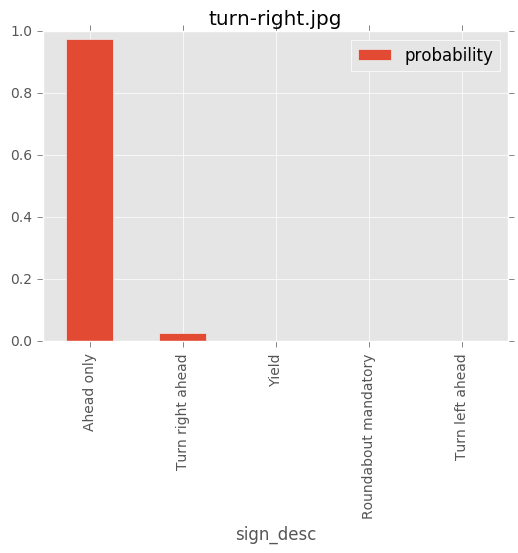

In [17]:
for i in range(len(my_top5)//5):
    b = my_top5[my_top5['image_id'] == i]
    b.drop('image_id', axis=1).plot.bar(x='sign_desc', y='probability' , title=img_paths[i])
    

In [77]:
## Manually Select the top predictions for signs
signnames = pd.read_csv('signnames.csv')    

for n in prediction:
    max_value = max(n)
    idx = np.arange(len(n))
    i = idx[n==max_value][0] 

    name = signnames[signnames['ClassId'] == i]
    print(name)

    ClassId   SignName
25       25  Road work
    ClassId  SignName
17       17  No entry
    ClassId         SignName
26       26  Traffic signals
    ClassId   SignName
25       25  Road work
    ClassId                               SignName
11       11  Right-of-way at the next intersection
    ClassId   SignName
25       25  Road work
    ClassId    SignName
35       35  Ahead only


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Image Augmentation


In [ ]:
def distorted_inputs(X_train, y_train, batch_size):
    """Construct distorted input for CIFAR training using the Reader ops.

    Args:
    data_dir: Path to the data directory.
    batch_size: Number of images per batch.

    Returns:
    images: Images. 4D tensor of [batch_size, IMAGE_SIZE, IMAGE_SIZE, 3] size.
    labels: Labels. 1D tensor of [batch_size] size.
    """
#     filenames = [os.path.join(data_dir, 'data_batch_%d.bin' % i) for i in xrange(1, 6)]
#     for f in filenames:
#         if not tf.gfile.Exists(f):
#             raise ValueError('Failed to find file: ' + f)

#     # Create a queue that produces the filenames to read.
#     filename_queue = tf.train.string_input_producer(filenames)

#     # Read examples from files in the filename queue.
#     read_input = read_cifar10(filename_queue)
#     reshaped_image = tf.cast(read_input.uint8image, tf.float32)

    height = 32
    width = 32

    # Image processing for training the network. Note the many random
    # distortions applied to the image.

    # Randomly crop a [height, width] section of the image.
    distorted_image = tf.random_crop(X_train, [height, width, 3])

    # Randomly flip the image horizontally.
    distorted_image = tf.image.random_flip_left_right(distorted_image)

    # Because these operations are not commutative, consider randomizing
    # the order their operation.
    distorted_image = tf.image.random_brightness(distorted_image, max_delta=63)
    distorted_image = tf.image.random_contrast(distorted_image, lower=0.2, upper=1.8)

    # Subtract off the mean and divide by the variance of the pixels.
    float_image = tf.image.per_image_whitening(distorted_image)

    # Ensure that the random shuffling has good mixing properties.
    min_fraction_of_examples_in_queue = 0.4
    min_queue_examples = int(NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN *
                             min_fraction_of_examples_in_queue)
    print('Filling queue with %d CIFAR images before starting to train.'
          'This will take a few minutes.' % min_queue_examples)

    # Generate a batch of images and labels by building up a queue of examples.
    return _generate_image_and_label_batch(float_image, read_input.label,
                                           min_queue_examples, batch_size,
                                           shuffle=True)

### Additional Ideas
AUGMENT THE TRAINING DATA
Augmenting the training set might help improve model performance. Common data augmentation techniques include rotation, translation, zoom, flips, and/or color perturbation. These techniques can be used individually or combined.

ANALYZE NEW IMAGE PERFORMANCE IN MORE DETAIL
Calculating the accuracy on these five German traffic sign images found on the web might not give a comprehensive overview of how well the model is performing. Consider ways to do a more detailed analysis of model performance by looking at predictions in more detail. For example, calculate the precision and recall for each traffic sign type from the test set and then compare performance on these five new images..

If one of the new images is a stop sign but was predicted to be a bumpy road sign, then we might expect a low recall for stop signs. In other words, the model has trouble predicting on stop signs. If one of the new images is a 100 km/h sign but was predicted to be a stop sign, we might expect precision to be low for stop signs. In other words, if the model says something is a stop sign, we're not very sure that it really is a stop sign.

Looking at performance of individual sign types can help guide how to better augment the data set or how to fine tune the model.

CREATE VISUALIZATIONS OF THE SOFTMAX PROBABILITIES
For each of the five new images, create a graphic visualization of the soft-max probabilities. Bar charts might work well.

VISUALIZE LAYERS OF THE NEURAL NETWORK
See Step 4 of the Iptyon notebook for details about how to do this.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [18]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [66]:
from tensorflow.contrib.layers import flatten
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, num_classes)

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

# Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(6))
conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
# Activation.
conv1 = tf.nn.relu(conv1, name='relu1')

# Pooling. Input = 28x28x6. Output = 14x14x6.
conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
conv1 = tf.layers.dropout(conv1, rate=keep_prob)


# Layer 2: Convolutional. Output = 10x10x16.
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(16))
conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
# Activation.
conv2 = tf.nn.relu(conv2, name='relu2')
# Pooling. Input = 10x10x16. Output = 5x5x16.
conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
conv2 = tf.layers.dropout(conv2, rate=keep_prob)


# Flatten. Input = 5x5x16. Output = 400.
fc0   = flatten(conv2)

# Layer 3: Fully Connected. Input = 400. Output = 120.
fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(120))
fc1   = tf.matmul(fc0, fc1_W) + fc1_b    
# Activation.
fc1    = tf.nn.relu(fc1)
fc1    = tf.layers.dropout(fc1, rate=keep_prob)

# Layer 4: Fully Connected. Input = 120. Output = 84.
fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
fc2_b  = tf.Variable(tf.zeros(84))
fc2    = tf.matmul(fc1, fc2_W) + fc2_b
# Activation.
fc2    = tf.nn.relu(fc2)
fc2    = tf.layers.dropout(fc2, rate=keep_prob)

# Layer 5: Fully Connected. Input = 84. Output = 10.
fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, num_classes), mean = mu, stddev = sigma))
fc3_b  = tf.Variable(tf.zeros(num_classes))
logits = tf.matmul(fc2, fc3_W) + fc3_b

print('Done')

Done


In [64]:
EPOCHS = 30
BATCH_SIZE = 256
keep_prob = 0.8
num_classes = 43
rate = 0.001

In [67]:
# Setup the Ops

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
make_prediction = tf.nn.softmax(logits)

print('Done')

Done


In [68]:
# Setup the Evalution Metrics 
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print('Done')

Done


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training...

EPOCH 1 ...
Validation Accuracy = 0.623


EPOCH 2 ...
Validation Accuracy = 0.819


EPOCH 3 ...
Validation Accuracy = 0.835


EPOCH 4 ...
Validation Accuracy = 0.864


EPOCH 5 ...
Validation Accuracy = 0.876


EPOCH 6 ...
Validation Accuracy = 0.888


EPOCH 7 ...
Validation Accuracy = 0.883


EPOCH 8 ...
Validation Accuracy = 0.895


EPOCH 9 ...
Validation Accuracy = 0.888


EPOCH 10 ...
Validation Accuracy = 0.896


EPOCH 11 ...
Validation Accuracy = 0.894


EPOCH 12 ...
Validation Accuracy = 0.901


EPOCH 13 ...
Validation Accuracy = 0.907


EPOCH 14 ...
Validation Accuracy = 0.902


EPOCH 15 ...
Validation Accuracy = 0.907


EPOCH 16 ...
Validation Accuracy = 0.892


EPOCH 17 ...
Validation Accuracy = 0.908


EPOCH 18 ...
Validation Accuracy = 0.910


EPOCH 19 ...
Validation Accuracy = 0.912


EPOCH 20 ...
Validation Accuracy = 0.902


EPOCH 21 ...
Validation Accuracy = 0.905


EPOCH 22 ...
Validation Accuracy = 0.915


EPOCH 23 ...
Validation Accuracy = 0.905


EPOCH 2

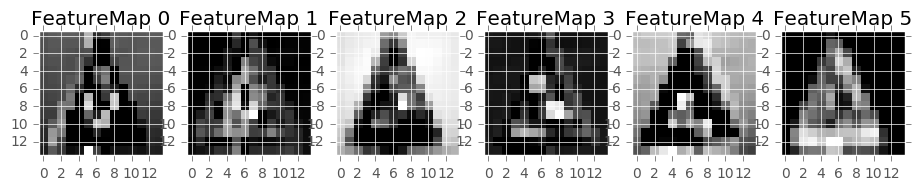

In [77]:
# Train the Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        outputFeatureMap(a[0].reshape((1, 32,32,3)), conv1, activation_min=-1, activation_max=-1 ,plt_num=1)
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

### CONV1 Feature Map

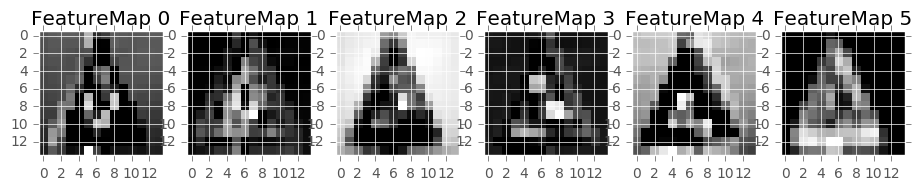

In [78]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    outputFeatureMap(a[0].reshape((1, 32,32,3)), conv1, activation_min=-1, activation_max=-1 ,plt_num=1)

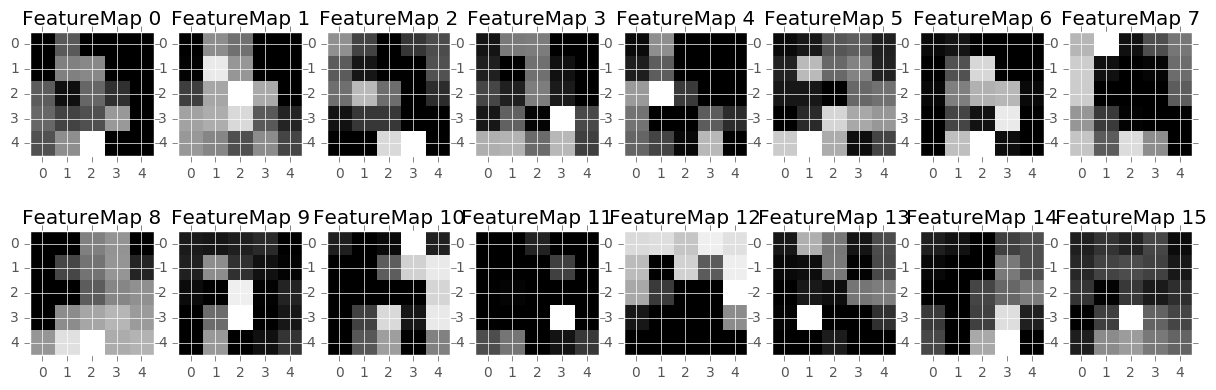

In [79]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    outputFeatureMap(a[0].reshape((1, 32,32,3)), conv2, activation_min=-1, activation_max=-1 ,plt_num=1)

## TEST MODEL ON TEST SET

In [81]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.899
